## Principal Component Analysis

Principal components analysis is an efficient approach to summarize data with a smaller number of representative variables. The maximum number of components is min(n-1, p), where n is the number of data set and p the number of features.

In this lab, we perform PCA on the USArrests data set. 

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The rows of the data set contain the 50 states, in alphabetical order. The columns of the data set contain four variables relating to various crimes:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [3]:
#Let’s start by taking a quick look at the column means of the data
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

We see right away the the data have vastly different means. We can also examine the variances of the
four variables

In [4]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

Not surprisingly, the variables also have vastly different variances. If we failed to scale the variables before
performing PCA, then most of the principal components that we observed would be driven by the Assault
variable, since it has by far the largest mean and variance.

Thus, it is important to standardize the variables to have mean zero and standard deviation 1 before
performing PCA. We can do this using the scale() function from sklearn

In [5]:
from sklearn.preprocessing import scale

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [6]:
# Now we’ll use the PCA() function from sklearn to compute the loading vectors
from sklearn.decomposition import PCA

loading_vectors = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
loading_vectors

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


We see that there are four distinct principal components. This is to be expected because there are in
general min(n − 1, p) informative principal components in a data set with n observations and p variables.
Using the fittransform() function, we can get the principal component scores of the original data. We’ll
take a look at the first few states

In [7]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_pca.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


We can construct a biplot of the first two principal components using our loading vectors

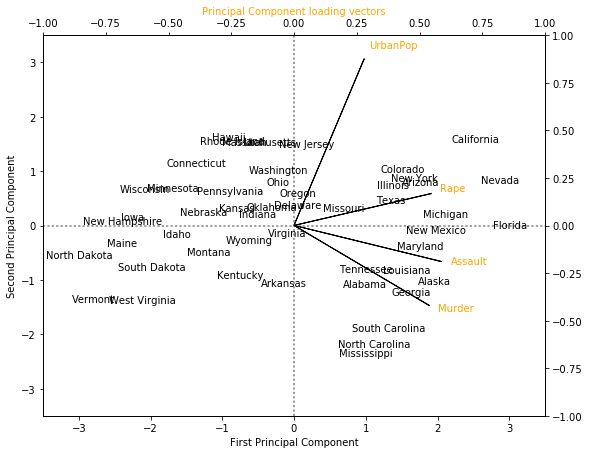

In [8]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_pca.index:
    ax1.annotate(i, (df_pca.PC1.loc[i], -df_pca.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in loading_vectors[['V1', 'V2']].index:
    ax2.annotate(i, (loading_vectors.V1.loc[i]*a, -loading_vectors.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,loading_vectors.V1[0], -loading_vectors.V2[0])
ax2.arrow(0,0,loading_vectors.V1[1], -loading_vectors.V2[1])
ax2.arrow(0,0,loading_vectors.V1[2], -loading_vectors.V2[2])
ax2.arrow(0,0,loading_vectors.V1[3], -loading_vectors.V2[3]);

In [9]:
# The PCA() function also outputs the variance explained by of each principal component. 
# We can access these values as follows

pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [10]:
# We can also get the proportion of variance explained
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the variance in the data, the next principal
component explains 24.7% of the variance, and so forth. We can plot the PVE explained by each component
as follows:

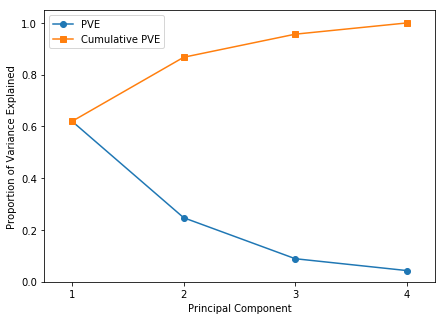

In [11]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='PVE')
#The function cumsum() computes the cumulative sum of the elements of a numeric vector
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative PVE')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);